# Riconoscimento delle Attività Umane con Smartphone (HAR)

# Obiettivo: Addestrare un modello di classificazione per riconoscere attività fisich (camminare, sedersi, salire scale, ecc.) usando dati da sensori.

# Importare delle librerie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# Caricamento del dataset

In [4]:
df = pd.read_csv("test.csv")  
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [6]:
df = pd.read_csv("train.csv")  
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


# Descrizione e panoramica dei dati

In [7]:
print("Dimensioni del dataset:", df.shape)
print("\nInformazioni sul dataset:")
df.info()

Dimensioni del dataset: (7352, 563)

Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [8]:
print("\nStatistiche descrittive:")
df.describe()


Statistiche descrittive:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


# Pulizia dei dati

In [9]:
print("Valori nulli:\n", df.isnull().sum())

Valori nulli:
 tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


In [10]:
df = df.dropna()

# Distribuzione delle attività

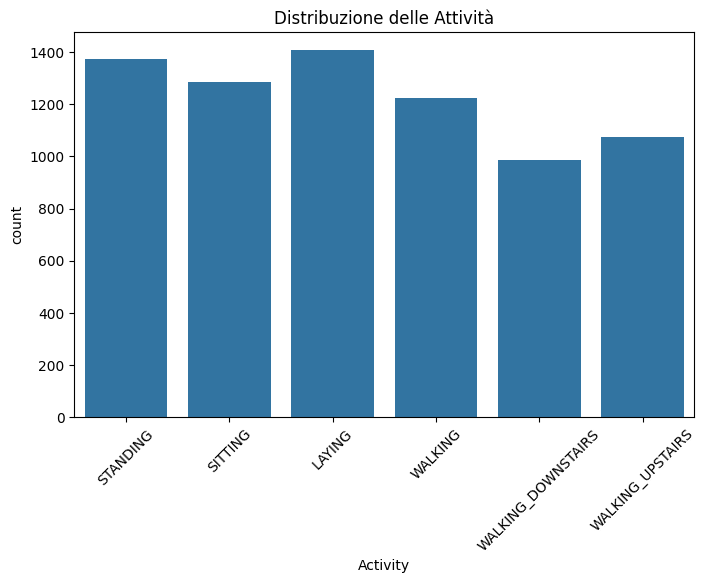

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='Activity', data=df)
plt.title("Distribuzione delle Attività")
plt.xticks(rotation=45)
plt.show()

#  Separazione features e target

In [ ]:
X = df.drop('Activity', axis=1)
y = df['Activity']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Statistiche descrittive per le principali features

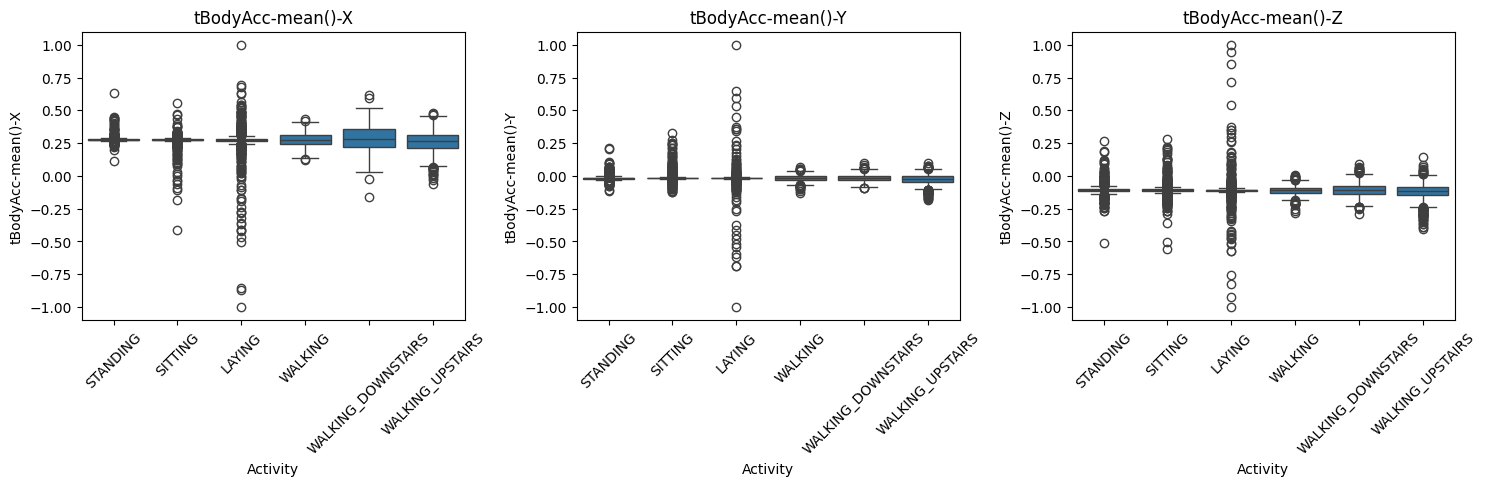

In [24]:
features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
            'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z']

# Boxplot per attività
plt.figure(figsize=(15,8))
for i, feat in enumerate(features[:3]):
    plt.subplot(2,3,i+1)
    sns.boxplot(x='Activity', y=feat, data=df)
    plt.title(feat)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Matrice di correlazione

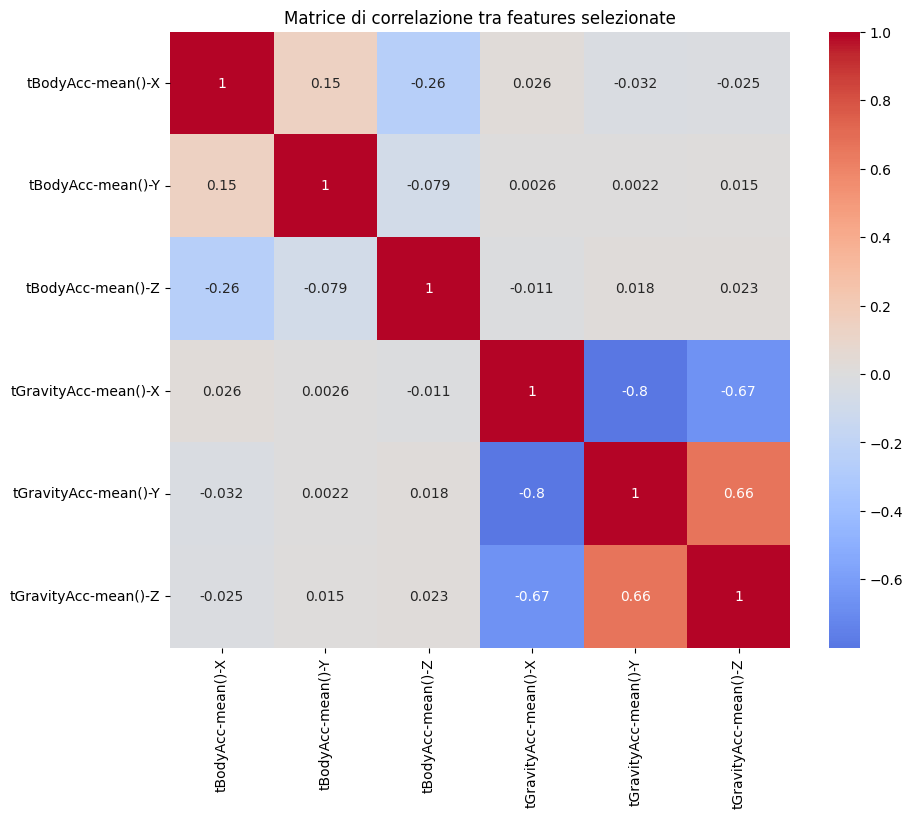

In [25]:
# Calcoliamo la correlazione tra alcune features principali
corr_matrix = df[features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice di correlazione tra features selezionate')
plt.show()

# Logistic regression

🔎 Logistic Regression - Accuracy: 0.9830047586675731

Classification Report (Logistic Regression):

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.96      0.96      0.96       262
          STANDING       0.96      0.96      0.96       276
           WALKING       1.00      0.99      0.99       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       0.99      0.99      0.99       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



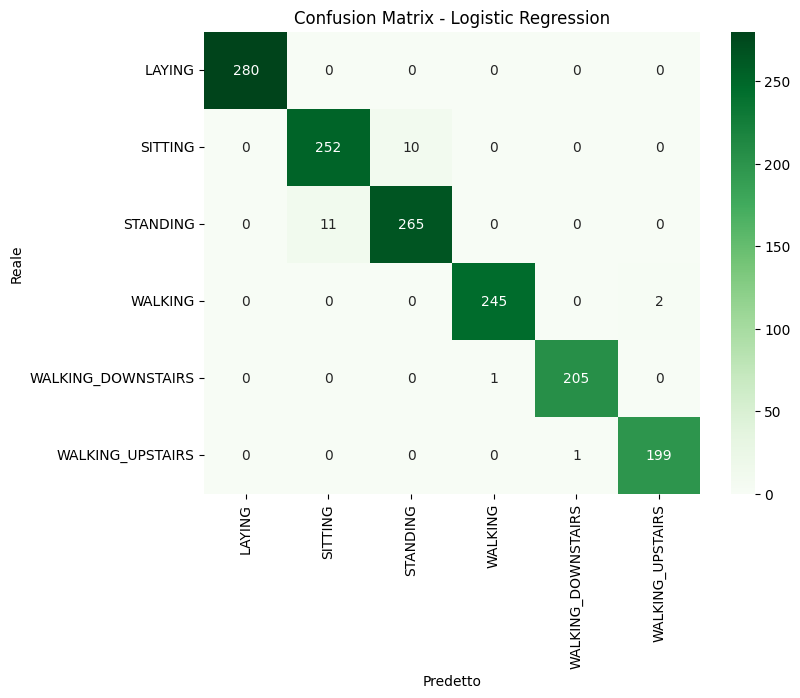

In [18]:
from sklearn.linear_model import LogisticRegression

# Creazione e addestramento del modello
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predizione sul test set
y_pred_logreg = logreg.predict(X_test)

# Valutazione del modello
print("🔎 Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred_logreg, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.show()


# Random forest classifier

🌲 Random Forest - Accuracy: 0.9802855200543847

Classification Report (Random Forest):

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.97      0.95      0.96       262
          STANDING       0.96      0.97      0.96       276
           WALKING       1.00      0.99      0.99       247
WALKING_DOWNSTAIRS       0.99      0.98      0.99       206
  WALKING_UPSTAIRS       0.97      0.99      0.98       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



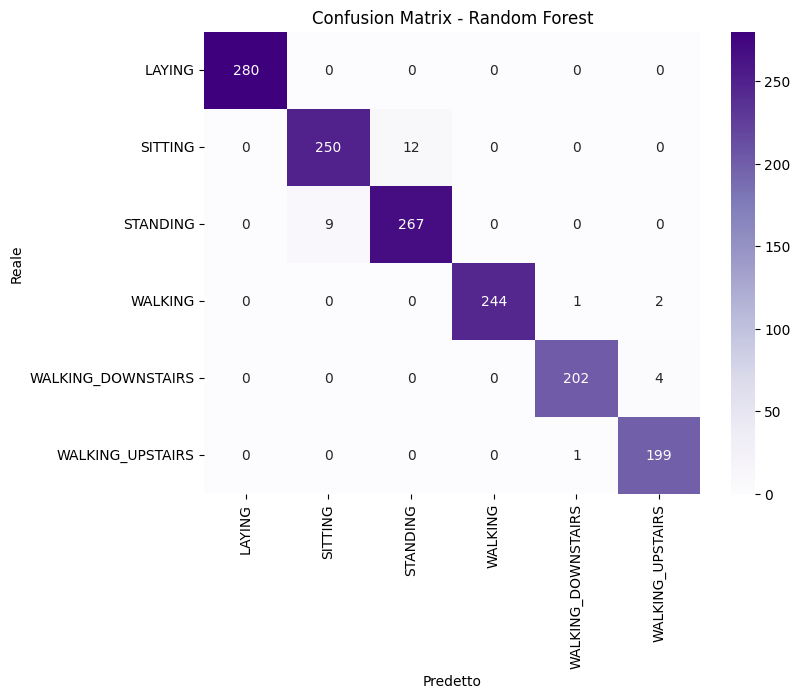

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Inizializza il modello
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestramento
rf.fit(X_train, y_train)

# Predizione
y_pred_rf = rf.predict(X_test)

# Valutazione
print("🌲 Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Purples',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.show()


# Costruzione del modello (Esempio con TensorFlow)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning Curve (TensorFlow)

Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0022 - val_accuracy: 0.9873 - val_loss: 0.0436
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9856 - val_loss: 0.0514
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9970 - loss: 0.0074 - val_accuracy: 0.9881 - val_loss: 0.0345
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 0.9864 - val_loss: 0.0480
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.0230 - val_accuracy: 0.9694 - val_loss: 0.1198
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9920 - loss: 0.0221 - val_accuracy: 0.9890 - val_loss: 0.0373
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9856 - val_loss: 0.0676
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.

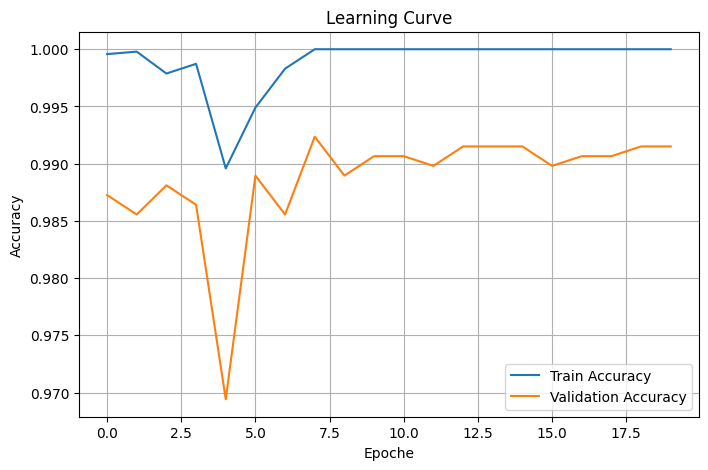

In [28]:

history = model.fithistory = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
# 📘 Curva di apprendimento
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Epoche')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Visualizzazione delle correlazioni

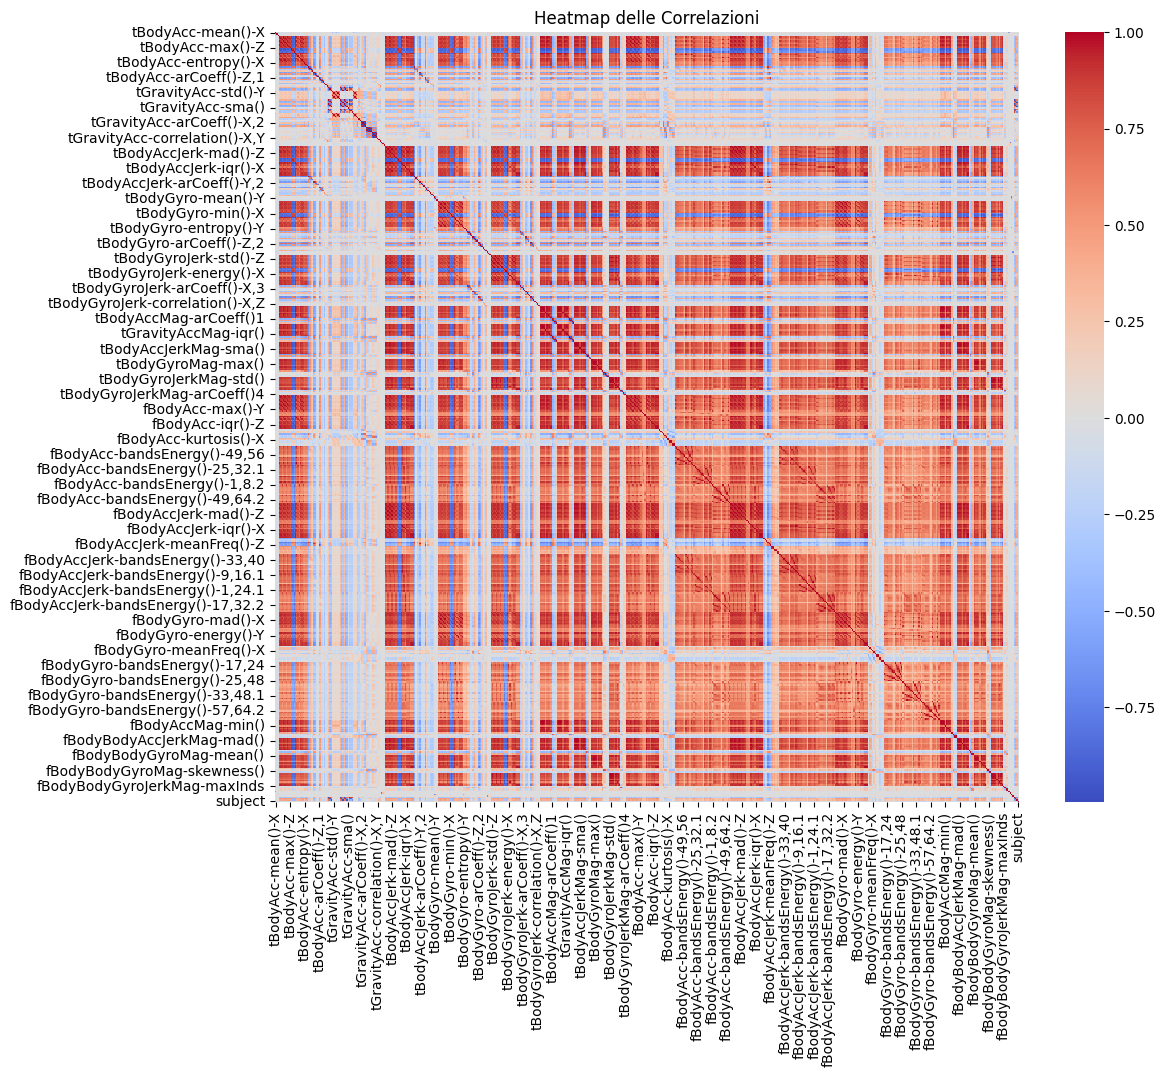

In [20]:
# 📘 Heatmap delle correlazioni
plt.figure(figsize=(12, 10))
corr_matrix = pd.DataFrame(X, columns=X.columns).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Heatmap delle Correlazioni")
plt.show()


# Valutazione del modello

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9850441876274643

Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.94      1.00      0.97       262
          STANDING       1.00      0.94      0.97       276
           WALKING       1.00      0.99      0.99       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       0.99      0.99      0.99       200

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471



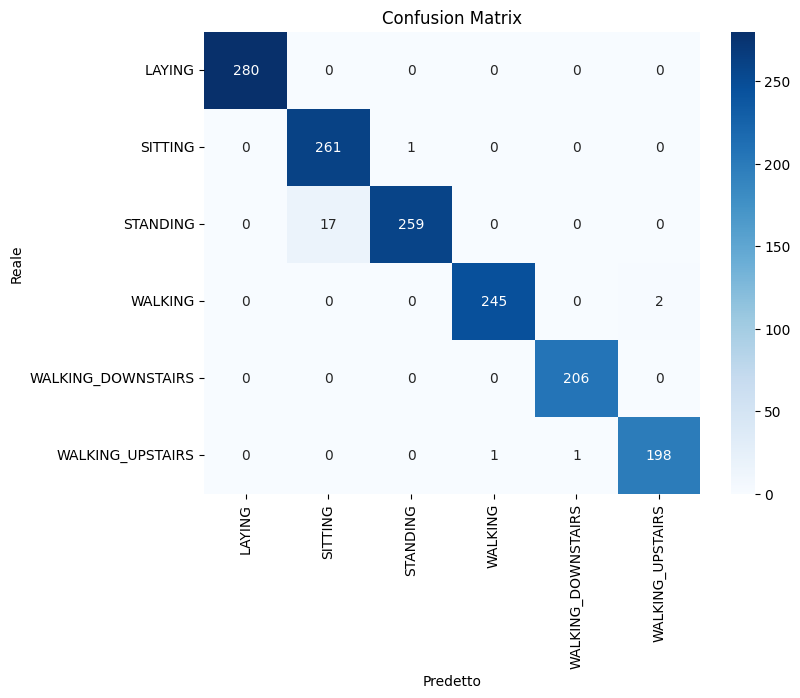

In [15]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_labels), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.show()

# Valutazione con confusion matrix normalizzata

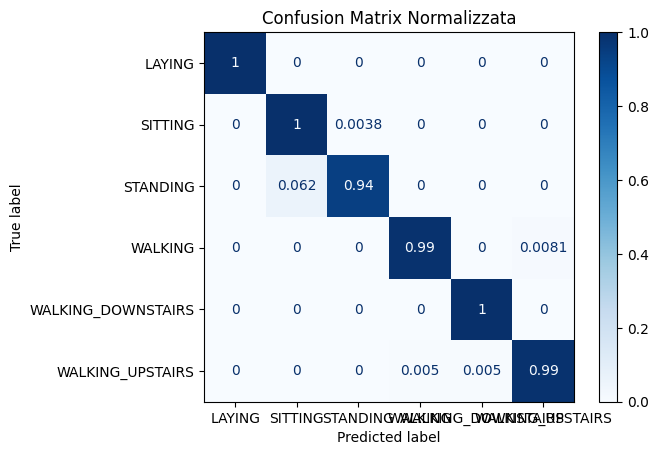

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_labels,
    display_labels=le.classes_,
    cmap="Blues",
    normalize='true'
)
plt.title("Confusion Matrix Normalizzata")
plt.show()


# Analisi della variabilità per soggetto

In [29]:
# Variabilità delle feature principali per attività
for feat in features:
    print(f"\nFeature: {feat}")
    for act in df['Activity'].unique():
        mean_val = np.mean(df[df['Activity'] == act][feat])
        std_val = np.std(df[df['Activity'] == act][feat])
        print(f"{act}: media = {mean_val:.3f}, deviazione standard = {std_val:.3f}")



Feature: tBodyAcc-mean()-X
STANDING: media = 0.279, deviazione standard = 0.020
SITTING: media = 0.273, deviazione standard = 0.042
LAYING: media = 0.269, deviazione standard = 0.102
WALKING: media = 0.276, deviazione standard = 0.050
WALKING_DOWNSTAIRS: media = 0.288, deviazione standard = 0.095
WALKING_UPSTAIRS: media = 0.262, deviazione standard = 0.078

Feature: tBodyAcc-mean()-Y
STANDING: media = -0.016, deviazione standard = 0.018
SITTING: media = -0.012, deviazione standard = 0.032
LAYING: media = -0.018, deviazione standard = 0.073
WALKING: media = -0.018, deviazione standard = 0.021
WALKING_DOWNSTAIRS: media = -0.016, deviazione standard = 0.027
WALKING_UPSTAIRS: media = -0.027, deviazione standard = 0.037

Feature: tBodyAcc-mean()-Z
STANDING: media = -0.107, deviazione standard = 0.036
SITTING: media = -0.107, deviazione standard = 0.045
LAYING: media = -0.107, deviazione standard = 0.090
WALKING: media = -0.109, deviazione standard = 0.032
WALKING_DOWNSTAIRS: media = -0.106

# PCA (Analisi delle componenti principali) per visualizzare i dati ridotti

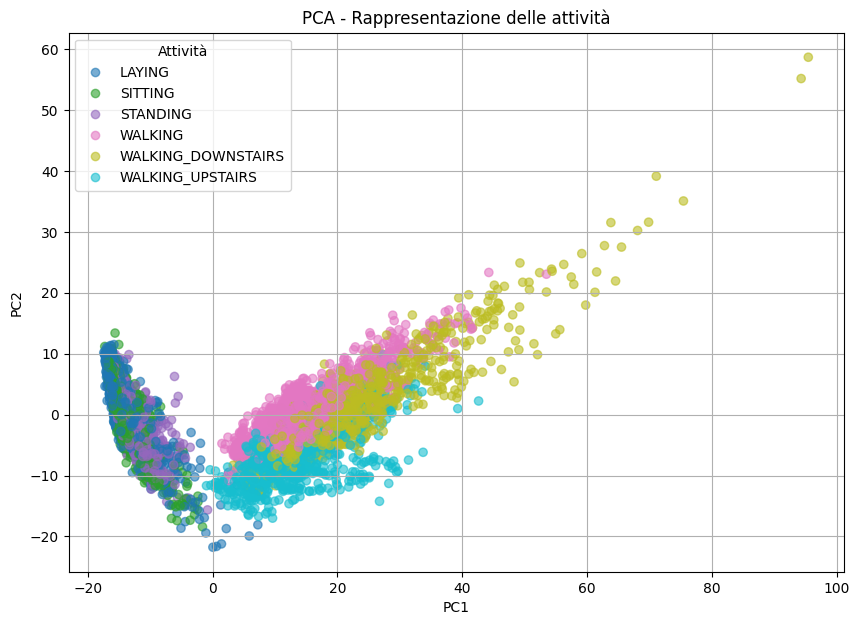

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_encoded, cmap='tab10', alpha=0.6)

# Estrai handles e labels dal grafico
handles, _ = scatter.legend_elements()
labels = list(le.classes_)  # converti le classi in lista Python

plt.legend(handles=handles, labels=labels, title="Attività")
plt.title("PCA - Rappresentazione delle attività")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()



# Learning curve Random Forest

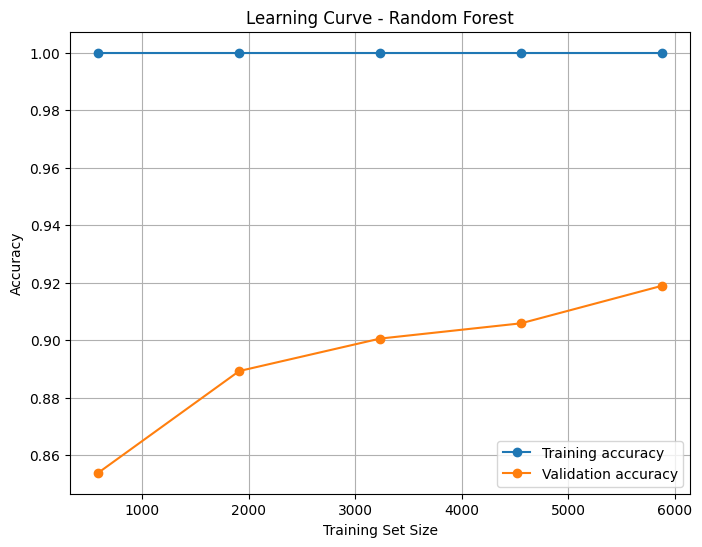

In [31]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_scaled, y_encoded, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', label='Validation accuracy')
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# Statistica con statsmodels: confronto di media tra classi

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA per una feature rispetto ad Activity
model = ols('Q("tBodyAcc-mean()-X") ~ C(Activity)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA tBodyAcc-mean()-X rispetto all'attività:")
print(anova_table)


ANOVA tBodyAcc-mean()-X rispetto all'attività:
                sum_sq      df         F        PR(>F)
C(Activity)   0.430224     5.0  17.62691  2.115464e-17
Residual     35.859126  7346.0       NaN           NaN


# Matrice di correlazione delle attività (medie per ogni classe)

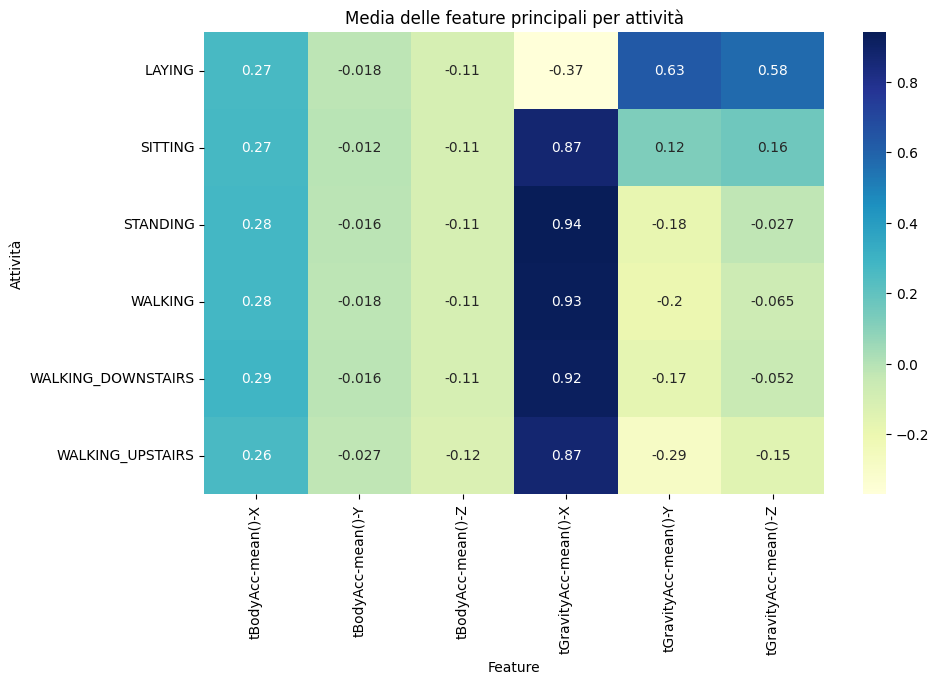

In [33]:
activity_means = df.groupby("Activity")[features].mean()
plt.figure(figsize=(10,6))
sns.heatmap(activity_means, cmap="YlGnBu", annot=True)
plt.title("Media delle feature principali per attività")
plt.xlabel("Feature")
plt.ylabel("Attività")
plt.show()


# applicare K-Means per vedere se le attività si raggruppano naturalmente.

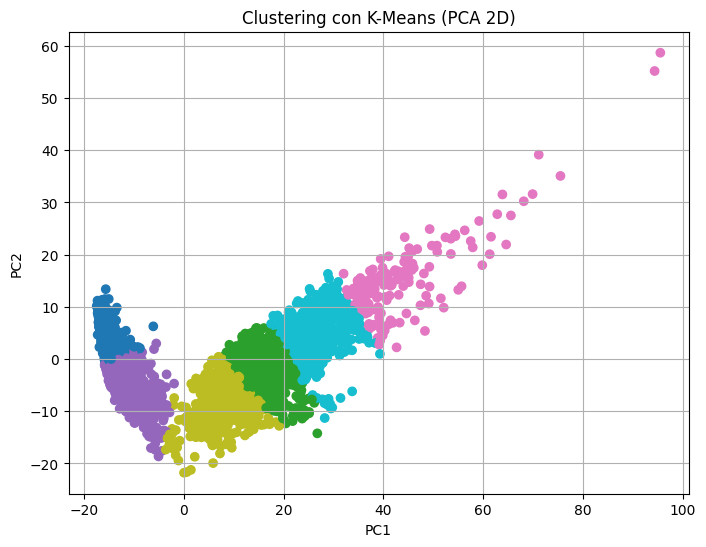

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_pca)  # Usa PCA per 2D

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='tab10')
plt.title("Clustering con K-Means (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


# Text Embedding

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Simuliamo una colonna testuale
df['Descrizione'] = df['Activity'].apply(lambda x: f"L'utente sta eseguendo l'attività {x.lower()}.")
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(df['Descrizione'])

print("Shape dell'embedding testuale:", text_features.shape)


Shape dell'embedding testuale: (7352, 10)


# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

target_feature = "tBodyAcc-mean()-X"

# Seleziona solo colonne numeriche (esclude testo, categorie ecc.)
X_reg = df.drop(['Activity', target_feature], axis=1).select_dtypes(include='number')
y_reg = df[target_feature]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train_r, y_train_r)

print("Score R^2:", lr.score(X_test_r, y_test_r))


Score R^2: 0.754152976543451
